# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [ ]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

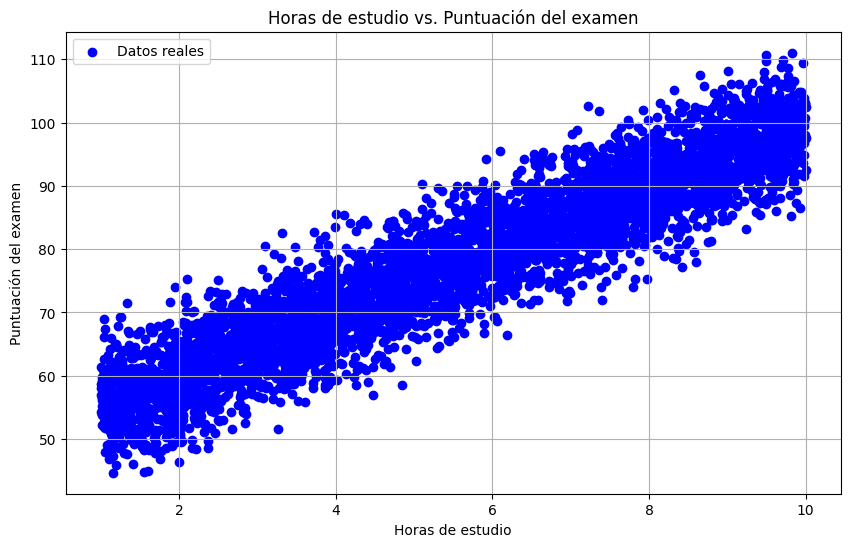

In [ ]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [ ]:

 def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = 0
    b = 0

    # Listas para almacenar las pérdidas por epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # Iterar por cada epoch
    for epoch in range(epochs):
        # 3. Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = w * X_train + b

        # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch
        train_loss = mean_squared_error(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # 5. Calcular los gradientes para los pesos w y b
        dw = (-2 / len(X_train)) * np.sum(X_train * (y_train - y_pred_train))
        db = (-2 / len(X_train)) * np.sum(y_train - y_pred_train)

        # 6. Actualizar los pesos w y b
        w = w - lr * dw
        b = b - lr * db

        # 7. Calcular y_pred del conjunto de validación por epoch
        y_pred_val = w * X_val + b

        # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch
        val_loss = mean_squared_error(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [ ]:
# Hiperparámetros
lr = 0.001
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)


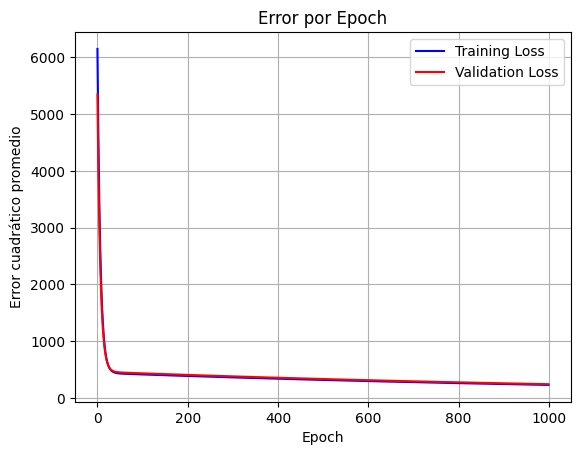

In [ ]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b', label='Training Loss')
plt.plot(range(epochs), val_loss_per_epoch, '-r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.legend()
plt.grid(True)
plt.show()

Costo del modelo (MSE): 243.3662260350828


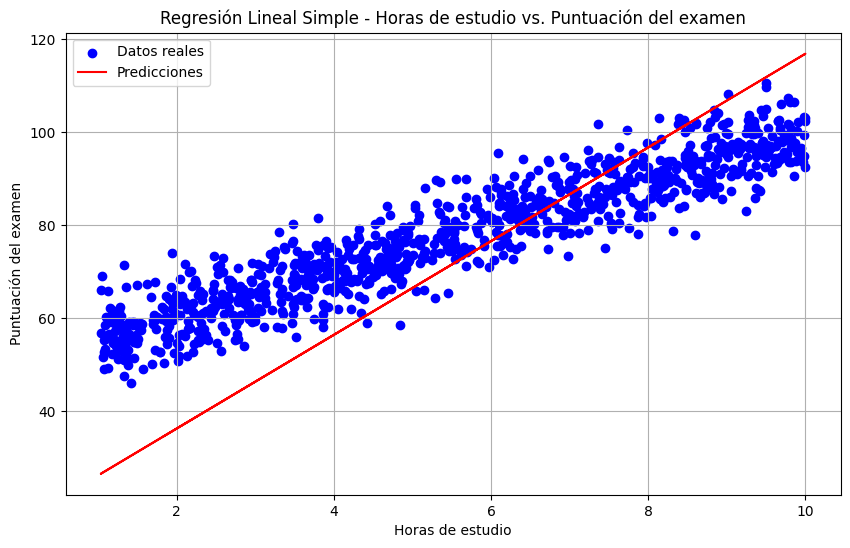

In [ ]:

# Realizar predicciones en test
y_pred = w * X_test + b

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)
print("Costo del modelo (MSE):", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 243.3662260350828
MAE en el conjunto de test: 13.162928537944998
R^2 en el conjunto de test: -0.2209795584148455
MAPE en el conjunto de test: 0.1856208230039798


## Implementación de la regresión lineal usando sklearn


Evaluación del modelo con sklearn:
MSE en el conjunto de test: 25.249637383330832
MAE en el conjunto de test: 3.9544897494040634
R^2 en el conjunto de test: 0.8733214069811396
MAPE en el conjunto de test: 0.05257659436831548
Coeficientes del modelo sklearn: 5.01401554246229
Intercepción del modelo sklearn: 49.793769346749855


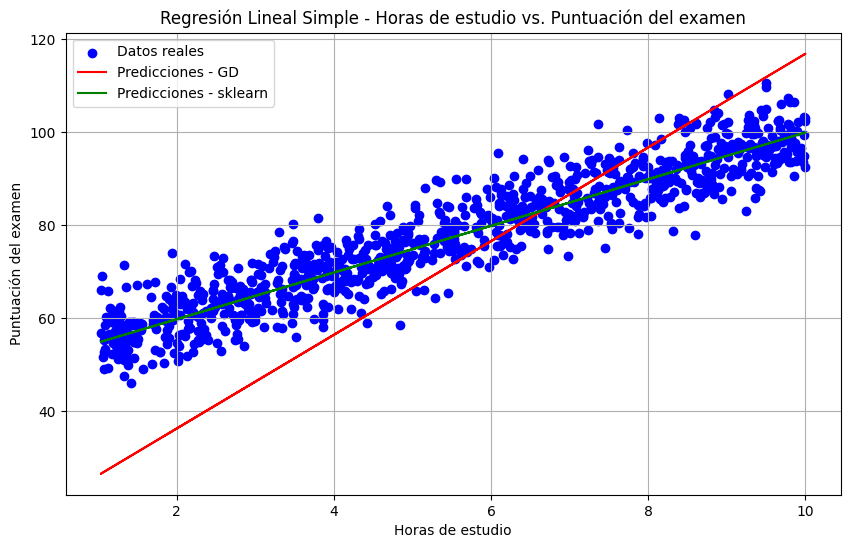

In [ ]:
# Implementación con sklearn
# Crear una instancia del modelo de sklearn y entrenarlo
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train.reshape(-1, 1), y_train)

# Predecir usando el modelo entrenado
y_pred_sklearn = lr_sklearn.predict(X_test.reshape(-1, 1))

# Calcular las métricas de evaluación para el modelo de sklearn
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mape_sklearn = mean_absolute_percentage_error(y_test, y_pred_sklearn)

# Imprimir los resultados
print("\nEvaluación del modelo con sklearn:")
print("MSE en el conjunto de test:", mse_sklearn)
print("MAE en el conjunto de test:", mae_sklearn)
print("R^2 en el conjunto de test:", r2_sklearn)
print("MAPE en el conjunto de test:", mape_sklearn)
print("Coeficientes del modelo sklearn:", lr_sklearn.coef_[0])
print("Intercepción del modelo sklearn:", lr_sklearn.intercept_)

# Visualización del modelo de sklearn
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones - GD')
plt.plot(X_test, y_pred_sklearn, color='green', label='Predicciones - sklearn')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


## Comparación de parámetros obtenidos

In [ ]:
# Obtener los parámetros del modelo sklearn
b_sklearn = lr_sklearn.intercept_
w_sklearn = lr_sklearn.coef_[0]

# Imprimir los parámetros de ambos modelos
print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

# Comparar los parámetros
print("\nComparación de parámetros obtenidos:")
print(f"Diferencia en la intercepción (b): {abs(b - b_sklearn)}")
print(f"Diferencia en la pendiente (w): {abs(w - w_sklearn)}")


Coeficiente de intercepción (b) - Manual: 16.21380726779531
Coeficiente de pendiente (w) - Manual: 10.064189867396644
Coeficiente de intercepción (b) - Scikit-learn: 49.793769346749855
Coeficiente de pendiente (w) - Scikit-learn: 5.01401554246229

Comparación de parámetros obtenidos:
Diferencia en la intercepción (b): 33.579962078954544
Diferencia en la pendiente (w): 5.050174324934354


Conclusiones:

La implementación manual del descenso del gradiente presenta un desafío en términos de encontrar los hiperparámetros correctos y garantizar la correcta convergencia de los parámetros.
El uso de bibliotecas optimizadas como sklearn es preferible para tareas de regresión lineal debido a su eficiencia, precisión y robustez.